<a href="https://colab.research.google.com/github/JunaidMovar/ML-DL-Learning/blob/master/SIAMESE_OVER_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
(XTrain,YTrain),(XTest,YTest) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)
print(YTest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


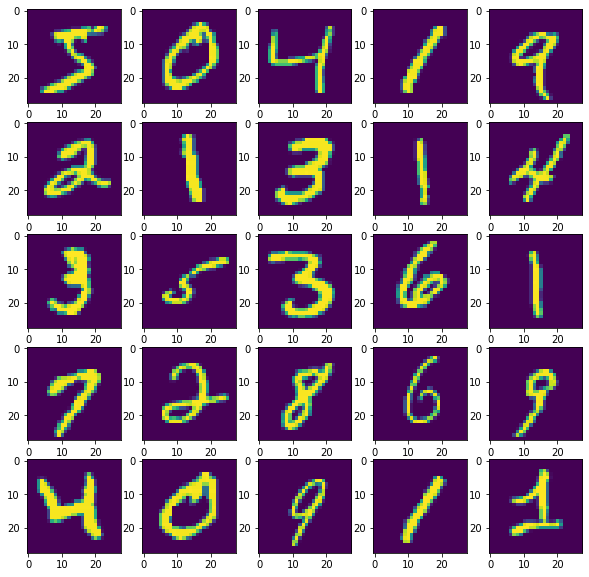

In [ ]:
Figure , Sub = plt.subplots(5,5,figsize=(10,10))
count = 0
for _ in range(0,5):
  for __ in range(0,5):
    Sub[_,__].imshow(XTrain[count])
    count += 1
Figure.show()

In [ ]:
def DataGenerator(batch,s='train'):
  assert batch % 2 == 0 and batch >= 2,"Batch value Must Be >= 2 and Even Number"
  if s == 'train':
    X,Y = XTrain,YTrain
  else:
    X,Y = XTest,YTest
  
  X1,X2,Similar = [],[],[]
  while batch >= 0:
    rnd1 = np.random.randint(0,len(Y))
    rnd2 = np.random.randint(0,len(Y))
    #Similar Images With X1 and X2 with Similarity of 1
    X1.append(X[rnd1])
    while Y[rnd1] != Y[rnd2] and rnd1 != rnd2:      
      rnd2 = np.random.randint(0,len(Y))
    X2.append(X[rnd2])
    #print('Similar',Vocab[Y[rnd1][0]], Vocab[Y[rnd2][0]])
    Similar.append(1)
    #Dissimilar Images With X1 and X2 with Similarity of 0
    X1.append(X[rnd1])
    rnd2 = np.random.randint(0,len(Y))
    while Y[rnd1] == Y[rnd2] and rnd1 != rnd2:
      rnd2 = np.random.randint(0,len(Y))
    X2.append(X[rnd2])
    #print('Dissimilar',Vocab[Y[rnd1][0]], Vocab[Y[rnd2][0]])
    Similar.append(0)
    batch -= 2
  X1 = np.array(X1)
  X2 = np.array(X2)
  Similar = np.array(Similar)
  return X1,X2,Similar
X1,X2,Y0 =DataGenerator(6)
def BatchGenerator(batch,s):
  while True:
    X1,X2 = [],[]
    Y = []
    X1,X2,Y = DataGenerator(batch,s)
    yield [X1,X2],Y

1
0
1
0
1
0


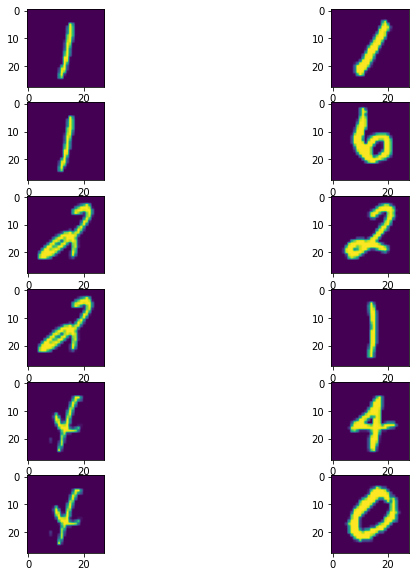

In [ ]:
X1,X2,Y0 =DataGenerator(6)
F,S = plt.subplots(6,2,figsize=(10,10),squeeze=False)
cnt = 0
for __ in range(6):
  S[__,0].imshow(X1[cnt])
  S[__,1].imshow(X2[cnt])
  print(Y0[cnt])
  cnt += 1
F.show()

In [ ]:
def Show_History():
  plt.plot(History.history['accuracy'])
  plt.title('Accuracy')
  plt.show()
  plt.plot(History.history['val_accuracy'])
  plt.title('Validation Accuracy')
  plt.show()

  plt.plot(History.history['loss'])
  plt.title('Loss')
  plt.show()
  plt.plot(History.history['val_loss'])
  plt.title('Validation Loss')
  plt.show()


In [34]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,GlobalAveragePooling2D,\
                                    BatchNormalization,Dense,Input,Lambda
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import *

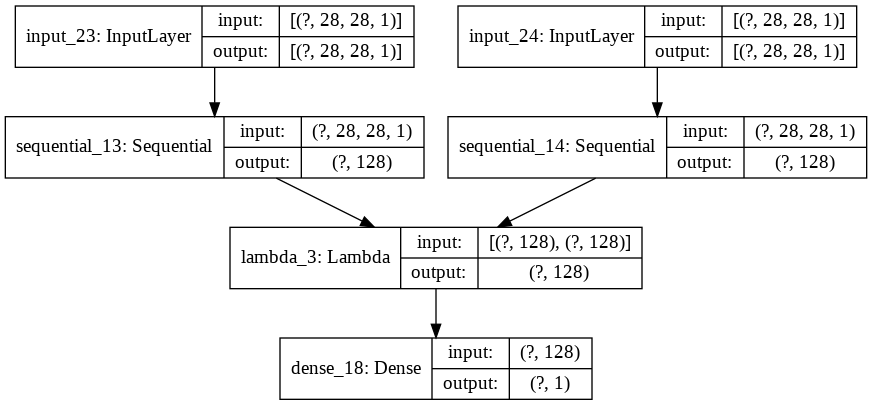

In [35]:
left_inp = Input(shape=(28,28,1))
right_inp = Input(shape=(28,28,1))

def Hands(inp):
  model = Sequential([
          Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(2e-4)),
          MaxPool2D((3,3)),

          Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(2e-4)),
          MaxPool2D((3,3)),

          Flatten(),
          Dense(128,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(2e-4)),
  ])
  return model(inp)
Left = Hands(left_inp)
Right = Hands(right_inp)

lam = Lambda(lambda x: K.abs(x[0]) - K.abs(x[1]))
lam_function = lam([Left,Right])

Pred = Dense(1,activation='sigmoid',kernel_initializer='he_normal',kernel_regularizer=l2(1e-2))(lam_function)

Siamese = Model(inputs=[left_inp,right_inp],outputs=Pred)

# def contrastive_loss(y_true, y_pred):
#     margin = 1
#     square_pred = K.square(y_pred)
#     margin_square = K.square(K.maximum(margin - y_pred, 0))
#     return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

Siamese.compile(loss='binary_crossentropy',optimizer=Adam(0.00001),metrics=['accuracy'])
#plot_model(model,)
plot_model(Siamese, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [38]:
History = Siamese.fit_generator(BatchGenerator(40,s='train'),\
                                validation_data=BatchGenerator(20,s='a'),\
                                epochs=1000,validation_steps=10,\
                                steps_per_epoch=50,verbose=2)

Epoch 1/1000
50/50 - 0s - loss: 0.8411 - accuracy: 0.4943 - val_loss: 0.8351 - val_accuracy: 0.5091
Epoch 2/1000
50/50 - 0s - loss: 0.8367 - accuracy: 0.4990 - val_loss: 0.8327 - val_accuracy: 0.5182
Epoch 3/1000
50/50 - 0s - loss: 0.8488 - accuracy: 0.4962 - val_loss: 0.8376 - val_accuracy: 0.5045
Epoch 4/1000
50/50 - 0s - loss: 0.8357 - accuracy: 0.5057 - val_loss: 0.8438 - val_accuracy: 0.5136
Epoch 5/1000
50/50 - 0s - loss: 0.8436 - accuracy: 0.4876 - val_loss: 0.8559 - val_accuracy: 0.4818
Epoch 6/1000
50/50 - 0s - loss: 0.8470 - accuracy: 0.4929 - val_loss: 0.8484 - val_accuracy: 0.5136
Epoch 7/1000
50/50 - 0s - loss: 0.8396 - accuracy: 0.5019 - val_loss: 0.8364 - val_accuracy: 0.4818
Epoch 8/1000
50/50 - 0s - loss: 0.8413 - accuracy: 0.4886 - val_loss: 0.8466 - val_accuracy: 0.4955
Epoch 9/1000
50/50 - 0s - loss: 0.8393 - accuracy: 0.4867 - val_loss: 0.8337 - val_accuracy: 0.4955
Epoch 10/1000
50/50 - 0s - loss: 0.8428 - accuracy: 0.4819 - val_loss: 0.8354 - val_accuracy: 0.5000

KeyboardInterrupt: ignored

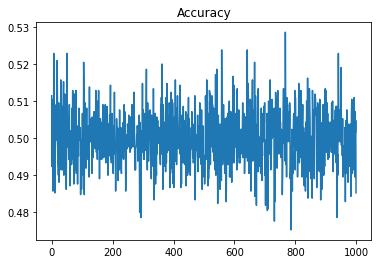

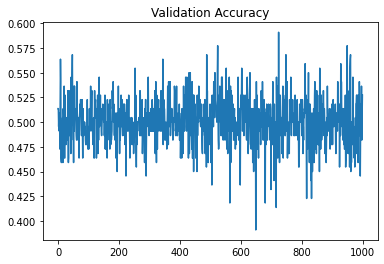

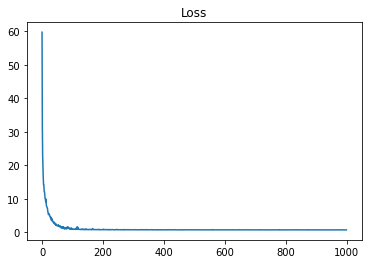

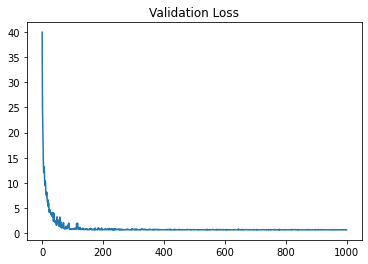

In [ ]:
Show_History()